In [1]:
from pymongo import MongoClient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to MongoDB
mongo = MongoClient(port=27017)
db = mongo["trails_columbia_river_gorge"]

In [2]:
# Loading the collection into a DataFrame
trails_data = pd.DataFrame(list(db.family_friendly_trailData.find()))

# Droping the MongoDB '_id' field
if "_id" in trails_data.columns:
    trails_data.drop(columns=['_id'], inplace=True)

In [3]:
# Filtering for relevant numerical columns
numeric_columns = [
    "distance(miles)", "high_point(feet)", "elevation_gain(feet)"
]
filtered_data = trails_data[numeric_columns]

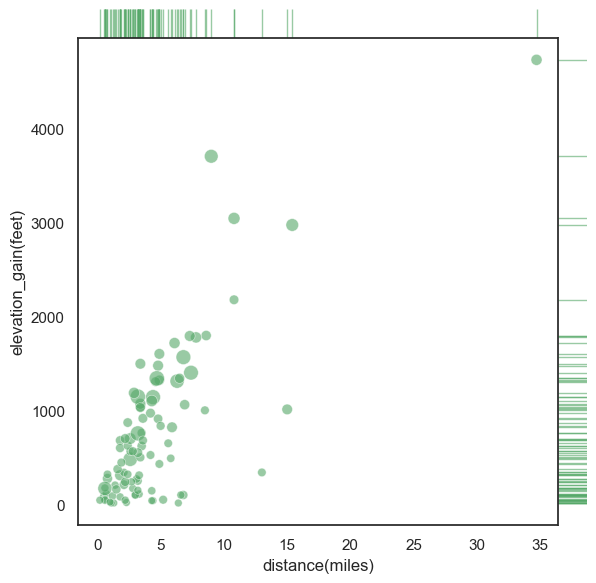

In [4]:
# Set the theme for seaborn
sns.set_theme(style="white", color_codes=True)

# Use JointGrid to create a custom plot
g = sns.JointGrid(data=filtered_data, x="distance(miles)", y="elevation_gain(feet)", space=0, ratio=17)

# Customizing the joint plot
g.plot_joint(sns.scatterplot, size=filtered_data["high_point(feet)"], sizes=(30, 120), color="g", alpha=.6, legend=False)

# Customizing the marginal plots (marginal rugplots)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

# Show the plot
plt.show()